<table width="100%" border="3">
  <tbody>
    <tr>
      <td ><img src="https://aidea-web.tw/images/web/logo_white.png" alt="Aidea" width="400"/></td>
      <td align='left'><h1>Exercise 3: Data augmentation </h1></td>
    </tr>
  </tbody>
</table>

# Exercise 3: Advanced solution with data augmentaion
* Add test images
* Simple CNN model

## Step 1: Load the dataset from google drive

In [ ]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='1N70KyhVsQZU2iiK19xlJubw0afQ2EMu5',dest_path='./content', unzip=True)

Unzipping...Done.


# (A) augment test images

## Step 1A: read test dataset

In [ ]:
import pandas as pd
df_train = pd.read_csv("train.csv")#,dtype=str
train_num = df_train.shape[0]
train_files = df_train.iloc[:train_num,0].values
train_labels = df_train.iloc[:train_num,1].values


## Step 1B: Add transposed images into the test dataset

In [ ]:
from PIL import Image
train_path = "train_images/"
df_train2 = pd.DataFrame(df_train)
for file,label in zip(train_files,train_labels ):
    img = Image.open(train_path+file)
    if label == 2 or label == 3 or label == 4:
        #flip image
        img_n1 = img.transpose(Image.FLIP_LEFT_RIGHT)
        file_n1 = file.replace(".png", "-h.png")
        img_n1.save(train_path+file_n1)
        new_row = {'ID':file_n1, 'Label':label}
        df_train2 = df_train2.append(new_row, ignore_index=True)#append row to the dataframe

        img_n2 = img.transpose(Image.FLIP_TOP_BOTTOM)
        file_n2 = file.replace(".png", "-v.png")
        img_n2.save(train_path+file_n2)
        new_row = {'ID':file_n2, 'Label':label}
        df_train2 = df_train2.append(new_row, ignore_index=True)#append row to the dataframe
    elif label == 1 or label == 5:
        img_n1 = img.transpose(Image.ROTATE_90)
        file_n1 = file.replace(".png", "-r1.png")
        img_n1.save(train_path+file_n1)
        new_row = {'ID':file_n1, 'Label':label}
        df_train2 = df_train2.append(new_row, ignore_index=True)#append row to the dataframe

        img_n2 = img.transpose(Image.ROTATE_180)
        file_n2 = file.replace(".png", "-r2.png")
        img_n2.save(train_path+file_n2)
        new_row = {'ID':file_n2, 'Label':label}
        df_train2 = df_train2.append(new_row, ignore_index=True)#append row to the dataframe
        
        img_n3 = img.transpose(Image.ROTATE_270)
        file_n3 = file.replace(".png", "-r3.png")
        img_n3.save(train_path+file_n3)
        new_row = {'ID':file_n3, 'Label':label}
        df_train2 = df_train2.append(new_row, ignore_index=True)#append row to the dataframe
print(df_train2.shape)

# (B) Train CNN models

## Step 2: Import python libraries

In [ ]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.2.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

## Step 3: read the training set

In [ ]:
import pandas as pd
df_train = pd.read_csv("train2.csv",dtype=str)
print(df_train.shape)

(2528, 2)


In [ ]:
df_train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [ ]:
train_num = df_train.shape[0]
train_files = df_train.iloc[:train_num,0].values
train_labels = df_train.iloc[:train_num,1].values
print(train_labels[:10])

['0' '1' '1' '5' '5' '5' '3' '0' '3' '5']


## Step 4: Show statistics of training images 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


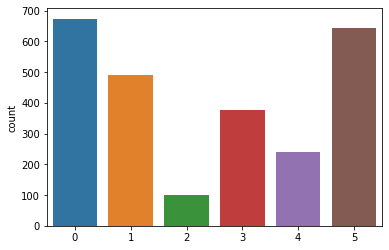

In [ ]:
import seaborn as sns
g = sns.countplot(train_labels)

In [ ]:
num_classes=6

## Step 5: Choose one of CNN models 
* DenseNet121(...): Instantiates the Densenet121 architecture.
* DenseNet169(...): Instantiates the Densenet169 architecture.
* DenseNet201(...): Instantiates the Densenet201 architecture.
* InceptionResNetV2(...): Instantiates the Inception-ResNet v2 architecture.
* InceptionV3(...): Instantiates the Inception v3 architecture.
* MobileNet(...): Instantiates the MobileNet architecture.
* MobileNetV2(...): Instantiates the MobileNetV2 architecture.
* NASNetLarge(...): Instantiates a NASNet model in ImageNet mode.
* NASNetMobile(...): Instantiates a Mobile NASNet model in ImageNet mode.
* ResNet101(...): Instantiates the ResNet101 architecture.
* ResNet101V2(...): Instantiates the ResNet101V2 architecture.
* ResNet152(...): Instantiates the ResNet152 architecture.
* ResNet152V2(...): Instantiates the ResNet152V2 architecture.
* ResNet50(...): Instantiates the ResNet50 architecture.
* ResNet50V2(...): Instantiates the ResNet50V2 architecture.
* VGG16(...): Instantiates the VGG16 model.
* VGG19(...): Instantiates the VGG19 architecture.
* Xception(...): Instantiates the Xception architecture.


In [ ]:
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

## Step 6: Instancing an ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
img_gen = ImageDataGenerator(horizontal_flip=False, vertical_flip=False, preprocessing_function=preprocess_input)

## Step 7: Set up a train_generator with flow_from_dataframe

In [ ]:
train_generator = img_gen.flow_from_dataframe(dataframe=df_train,
            directory="train_images",
            x_col="ID",
            y_col="Label",
            subset=None,
            batch_size=8,
            shuffle=False,
            class_mode="categorical",
            color_mode="rgb",
            target_size=(299,299))

Found 2528 validated image filenames belonging to 6 classes.


In [ ]:
train_generator.class_indices

## Step 8: step_size_train

In [ ]:
if train_generator.n % train_generator.batch_size ==0:
  step_size_train=train_generator.n//train_generator.batch_size
else:
  step_size_train=train_generator.n//train_generator.batch_size + 1
print(step_size_train)

## Step 9: ModelCheckpoint

In [ ]:
# Include the epoch in the file name (uses `str.format`)
import os
checkpoint_path = "training_cp/cp-{epoch:03d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights 
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)

## Step 10: EarlyStopping

In [ ]:
# Create a callback that stop the model 
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

## Step 11: Compile model

In [ ]:
#compile model using accuracy to measure model performance
#model.summary()
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(lr=3e-3),
            metrics=['accuracy'])

## Step 12: Train model

In [ ]:
hist = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, callbacks=[cp_callback, es_callback], epochs=100)

## Step 13: Evaluate saved checkpoints

In [ ]:
##checkpoint 1
model.load_weights("training_cp/cp-001.ckpt")
train_generator.reset()
model.evaluate_generator(generator=train_generator, steps=step_size_train, verbose=1)

In [ ]:
##checkpoint 2
model.load_weights("training_cp/cp-001.ckpt")
train_generator.reset()
model.evaluate_generator(generator=train_generator, steps=step_size_train, verbose=1)

In [ ]:
##checkpoint 3
model.load_weights("training_cp/cp-001.ckpt")
train_generator.reset()
model.evaluate_generator(generator=train_generator, steps=step_size_train, verbose=1)

## Step 14: Save the trained model

In [ ]:
model.load_weights("training_cp/cp-001.ckpt")
model.save("AOI-InceptionV3-0626.h5")

## Step 15: Check training results

In [ ]:
#y_predictions = model.predict(X_train, batch_size=20)
train_generator.reset()
y_predictions = model.predict_generator(generator=train_generator, steps=step_size_train, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
316/316 [==============================] - 9s 29ms/step


In [ ]:
print(y_predictions[:2])
type(y_predictions)

In [ ]:
predicts = np.argmax(y_predictions,axis=1)
print(predicts[0:10])

[0 1 1 5 5 5 3 0 3 5]


In [ ]:
labels = train_labels.astype(int)
print(labels[:10])

[0 1 1 5 5 5 3 0 3 5]


## Step 16: Analyze training results


In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(labels, predicts)
print(confusion)

[[674   0   0   0   0   0]
 [  4 484   0   2   1   1]
 [  0   0 100   0   0   0]
 [  0   0   0 376   1   1]
 [  0   0   0   2 238   0]
 [  0   4   0   0   0 640]]


In [ ]:
overkill= []
underkill = []
for i in range(train_num):
  if labels[i] == 0 and predicts[i] !=0:
    overkill.append(i)
  if labels[i] != 0 and predicts[i] ==0:
    underkill.append(i)
print('# of overkill= {}; # of underkill= {} '.format(len(overkill), len(underkill)))

## Step 17: Load the test set 

In [ ]:
df_test = pd.read_csv("test.csv",dtype=str)
print(df_test.shape)

In [ ]:
test_generator = img_gen.flow_from_directory(
            directory="test_images",
            batch_size=8,
            shuffle=False,
            class_mode=None,
            color_mode="rgb",
            target_size=(299,299))

In [ ]:
df_test.head()

In [ ]:
test_num = df_test.shape[0]
test_files  = df_test.iloc[:test_num,0].values
test_labels = df_test.iloc[:test_num,1].values
print(test_labels[:10])

## Step 18: Set up a test_generator with flow_from_dataframe

In [ ]:
test_generator = img_gen.flow_from_dataframe(dataframe=df_test,
            directory="test_images",
            x_col="ID",
            y_col="Label",
            batch_size=32,
            shuffle=False,
            class_mode=None,
            target_size=(299,299))

## Step 19: step_size_train

In [ ]:
if test_generator.n % test_generator.batch_size ==0:
  step_size_test=test_generator.n//test_generator.batch_size
else:
  step_size_test=test_generator.n//test_generator.batch_size + 1
print(step_size_test)

## Step 20: Check test results

In [ ]:
#y_predictions = model.predict(X_train, batch_size=20)
test_generator.reset()
y_predictions = model.predict_generator(generator=test_generator, steps=step_size_test,verbose=1)

In [ ]:
import numpy as np
predicts=np.argmax(y_predictions,axis=1)
predicts[:10]

## Step 21: Output test results

In [ ]:
df_out = pd.DataFrame(df_test)
df_out.shape

In [ ]:
df_out['Label'] = predicts
df_out.to_csv("0626-xception.csv", index=False)